### Bu dosyada filmler ile ilgili pek çok bilgi bulunmaktadır 🍿🎬 
Şu bilgilere ulaşmak mümkün: 🚀
* Film adları
* Film türleri
* Film yılları
* Film puanları
* Film oyuncuları
* Film prodüksoyununu yapan şirketler
* Film ülkeleri
* Film dilleri
* Aktör adları
* Aktör cinsiyetleri
* Başroller
* Aktörlerin oynadığı filmler 
* Aktörlerin oynadığı karakterler 


### Öncelikle gerekli kütüphaneleri import ediyoruz.Dosyaları okuyabilmek için pandas kütüphanesini kullanıyoruz.
Dosyaları tek tek okutuyoruz ve adlandırma yaparak ilerliyoruz.


In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies = pd.read_csv('movies.csv', index_col='movieid')
countries = pd.read_csv('countries.csv', index_col='movieid')
languages = pd.read_csv('languages.csv', index_col='movieid')
ratings = pd.read_csv('ratings.csv', index_col='movieid')
production_companies = pd.read_csv('prodcompanies.csv', index_col='movieid')
genres = pd.read_csv('genres.csv', index_col='movieid')
movies_to_actors = pd.read_csv('movies2actors.csv')
actors = pd.read_csv('actors.csv', index_col='actorid')


#index indeks bazlı birleştirme

joined = movies.join([
    countries,
    languages,
    ratings,
    production_companies,
    genres
    
    
], how='inner')


from sys import getsizeof
print(joined.shape, getsizeof(joined ) / 1024**2, 'MB')


joined.head()

(64742, 9) 28.490275382995605 MB


,title,year,country,language,rank,votes,distribution,name,genre
movieid,,,,,,,,,
1672052,'Breaker' Morant (1980),1980,Australia,Afrikaans,7.8,8111.0,0000001222,7 Network [au],Drama
1672052,'Breaker' Morant (1980),1980,Australia,Afrikaans,7.8,8111.0,0000001222,7 Network [au],History
1672052,'Breaker' Morant (1980),1980,Australia,Afrikaans,7.8,8111.0,0000001222,7 Network [au],War
1672052,'Breaker' Morant (1980),1980,Australia,Afrikaans,7.8,8111.0,0000001222,"Australian Film Commission, The [au]",Drama
1672052,'Breaker' Morant (1980),1980,Australia,Afrikaans,7.8,8111.0,0000001222,"Australian Film Commission, The [au]",History


In [391]:
movies.shape

(3832, 2)

In [392]:
actors.shape

(98690, 2)

In [393]:
movies_to_actors.shape

(138349, 4)

In [394]:
production_companies.shape

(9843, 1)

In [395]:
languages.shape

(4976, 1)

### Satırlardaki boşlukları silip satır sütunlardaki öğelerin eksikliklerini kontrol ediyoruz.

In [376]:
#herhangi bir satırda NaN değeri varsa o satırı siler
joined.dropna(inplace=True)


In [377]:
# her satır ve sütundaki tüm öğelerin eksik olup olmadığını kontrol edilir.
joined.isnull().any()


title           False
year            False
country         False
language        False
rank            False
votes           False
distribution    False
name            False
genre           False
dtype: bool

### Başrol aktörlerden ilk 20'sinin cinsiyetleri, oynadığı film sayılarını inceleyelim...🚀

In [378]:

actor_and_movies = movies_to_actors.join(actors, how='inner',on='actorid',)

actor_and_movies_grouped = actor_and_movies.groupby('actorid').count().drop(["leading","as_character"], axis=1).rename(columns={'movieid':'number_of_movies'}).sort_values('number_of_movies', ascending=False)

actor_and_movies_grouped['name'] = actors.loc[actor_and_movies_grouped.index]['name']

actor_and_movies_grouped['sex'] = actors.loc[actor_and_movies_grouped.index]['sex']


actor_and_movies_grouped.head(20)



,number_of_movies,name,sex
actorid,,,
1694741,51,"Welker, Frank",M
745232,36,"Jackson, Samuel L.",M
375938,33,"De Niro, Robert",M
1676554,31,"Walsh, M. Emmet",M
2092485,31,"Goldberg, Whoopi (I)",F
809720,29,"Keitel, Harvey (I)",M
667623,29,"Hedaya, Dan",M
438256,27,"Duvall, Robert",M
218714,27,"Buscemi, Steve",M


### Aktörlerin oynadıkları türleri bu şekilde inceleyebiliriz.🍿🎬 


In [379]:
joined_ = movies_to_actors.join(actors, how='inner',on='actorid',)

movie_gernes_with_actor = joined_.join(genres, how='inner',on='movieid',)
grouped = movie_gernes_with_actor.groupby('actorid')
grouped = grouped['genre'].apply(lambda x: x.str.cat(sep=',')).str.get_dummies(sep=',')
grouped['name'] = actors.loc[grouped.index]['name']


first_column = grouped.pop('name')

grouped.insert(0, 'name', first_column) # ismi en öne çekmek için yaptığım işlemler.


grouped.head(20)




,name,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
actorid,,,,,,,,,,,,,,,,,,,,,
4,"$hort, Too",0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
28,"'Dead End' Kids, The",0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
566,"Aaby, Kristian",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
580,Aadil,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
769,"Aamodt, Thor Michael",0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
797,"Aar, Jim",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
802,"Aaran, Abraxas",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
808,"Aard, Frank J.",0,0,0,0,0,1,1,0,1,...,0,1,1,1,0,0,0,0,0,0
851,"Aarniokoski, Douglas",1,0,0,0,0,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0


### Aktörlerin cinsiyetlerinin filmlere göre dağlımlarını görmek için aşağıdaki işlemi gerçekleştirdik. 🚀

In [380]:
joined_actors = movies_to_actors.join(actors, how='inner',on='actorid',)


movies_actors_joined = joined_actors.join(movies, how='inner',on='movieid',).join(genres, how='inner',on='movieid',)

sex_series = movies_actors_joined.groupby('genre')["genre"].apply( lambda x: movies_actors_joined["sex"].str.cat(sep=','))

t = sex_series.to_frame().transpose()

males = t.applymap(lambda x: x.count('M')).rename(index={'genre': "Male"})

females = t.applymap(lambda x: x.count('F')).rename(index={'genre': "Female"})


new_df = pd.concat([males,females])


new_df.head()

genre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
Male,258440,258440,258440,258440,258440,258440,258440,258440,258440,258440,...,258440,258440,258440,258440,258440,258440,258440,258440,258440,258440
Female,110867,110867,110867,110867,110867,110867,110867,110867,110867,110867,...,110867,110867,110867,110867,110867,110867,110867,110867,110867,110867


### Sırasıyla hangi dillerde daha çok filmlerin olduğunu inceleyelim 🚀🎬 

In [381]:
languages.groupby('language').value_counts().sort_values(ascending=False).to_frame().reset_index().rename(columns={0:'number_of_movies'}).head(30)

,language,number_of_movies
0,English,3440
1,French,328
2,Spanish,212
3,German,162
4,Italian,159
5,Russian,95
6,Japanese,65
7,Latin,42
8,Mandarin,40
9,Cantonese,36


### En çok skoru ve oyu almış ilk 30 filmi inceleyelim 🚀🎬

/var/folders/1d/h61j1x6s7xng6j3hsgq_zw040000gn/T/ipykernel_10893/3949534684.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ratings_joined['title'][:20], ratings_joined['rank'][:20], color='red')


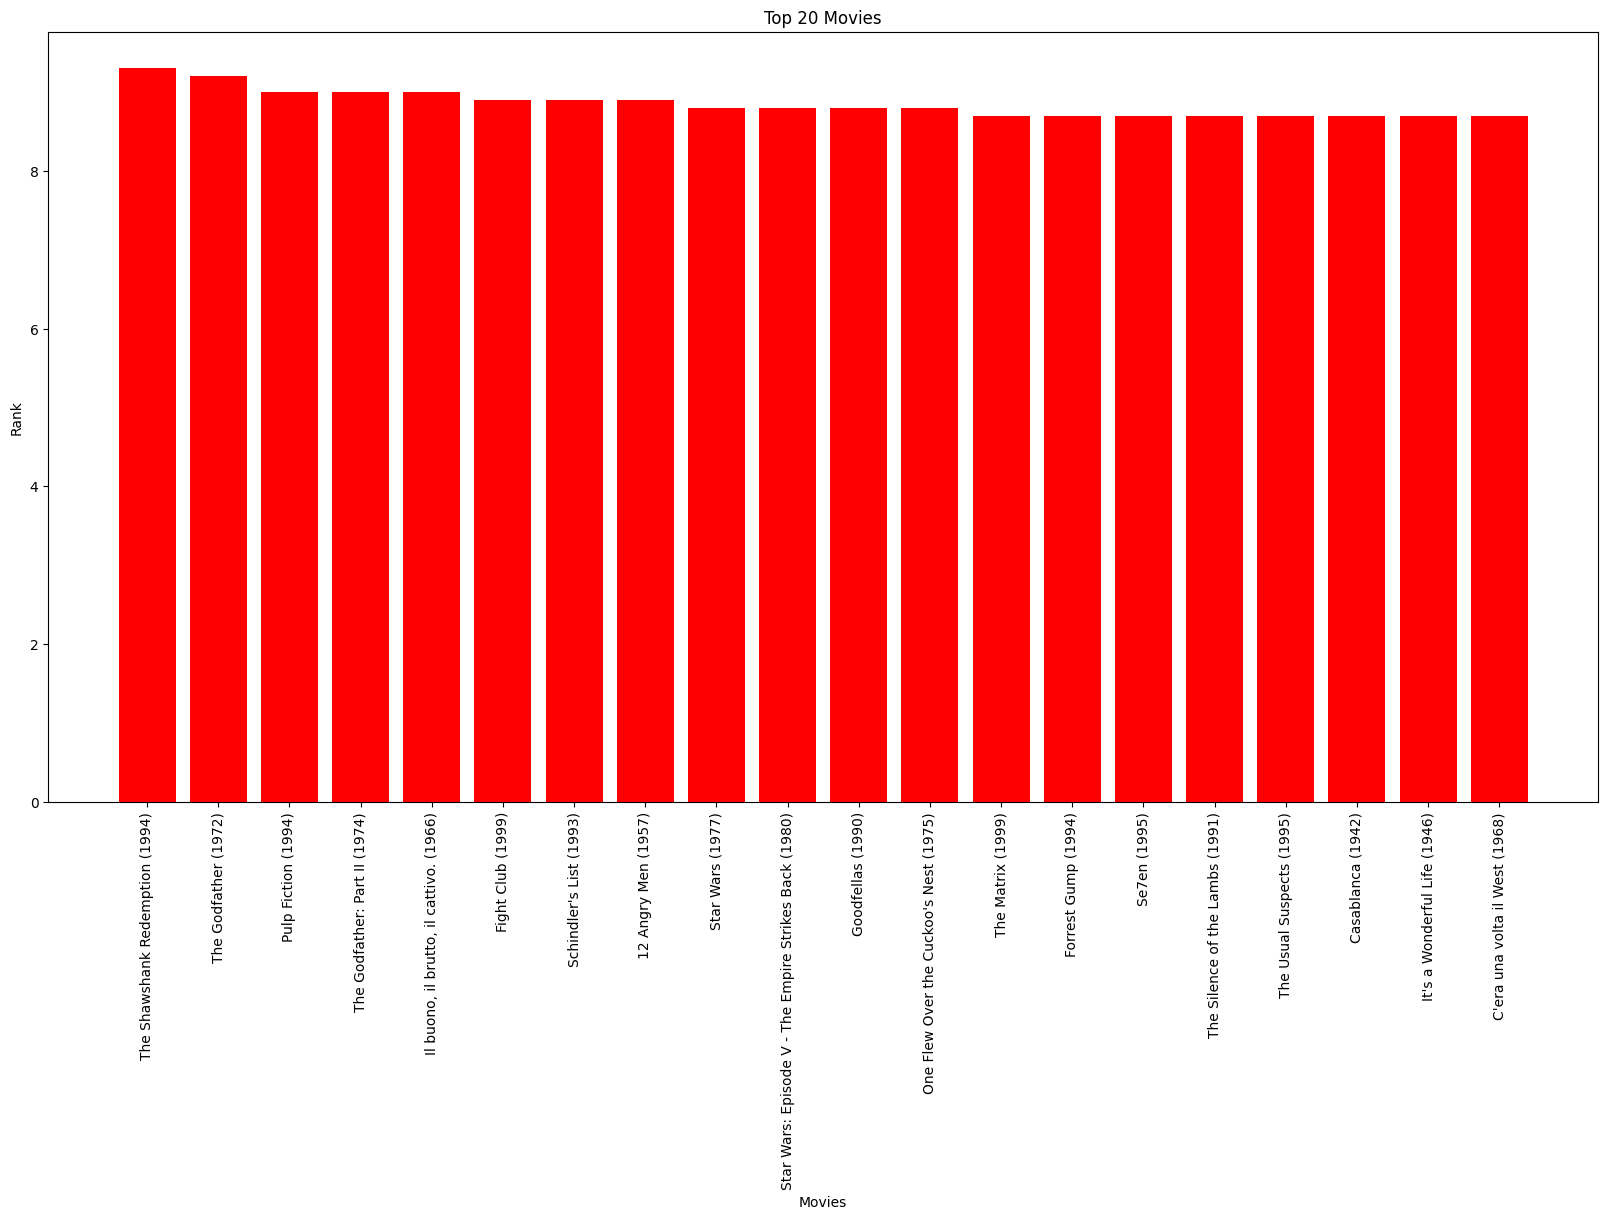

In [382]:
ratings_joined = ratings.join(movies, how='inner',on='movieid',)
ratings_joined = ratings_joined.sort_values(['rank','votes'], ascending=False)
 #bar chart  pink
plt.figure(figsize=(20,10))
plt.bar(ratings_joined['title'][:20], ratings_joined['rank'][:20], color='red')
plt.xticks(rotation=90)
plt.title('Top 20 Movies')
plt.xlabel('Movies')
plt.ylabel('Rank')
plt.show()


### Tüm zamanların en iyi 30 başrolünün gösterimi🚀🎬

<AxesSubplot: title={'center': 'En iyi oyuncular'}, ylabel='rank'>

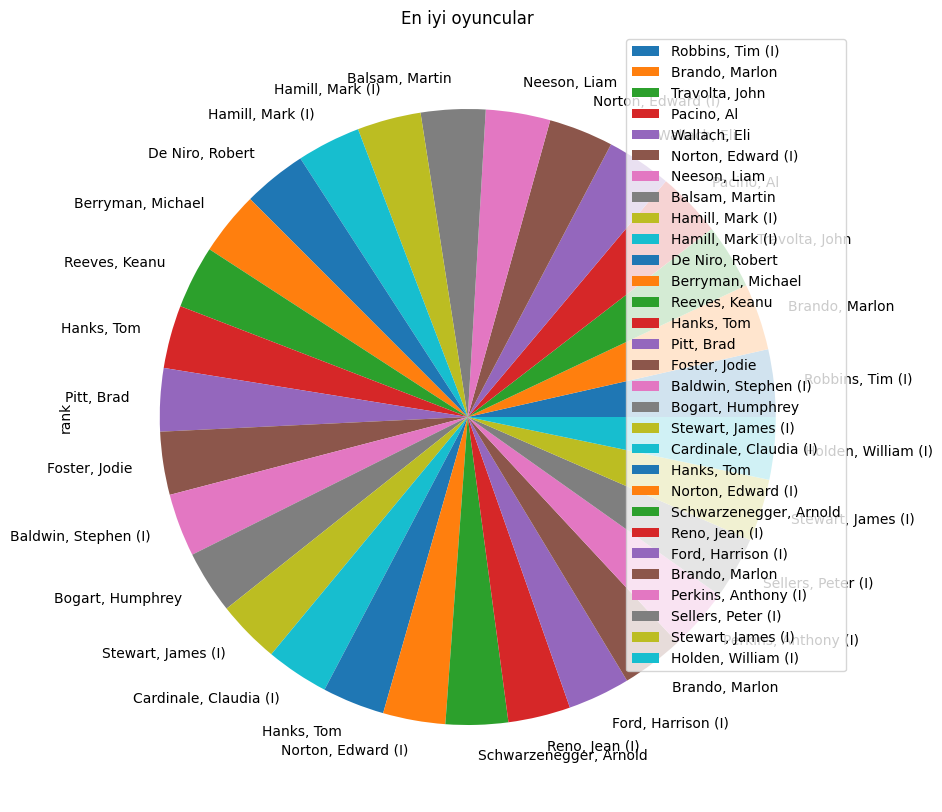

In [383]:
movies_actors_joined = movies_to_actors.join(actors, how='inner',on='actorid',)
movies_actors_joined = movies_actors_joined[movies_actors_joined['leading'] == 1]
movies_actors_joined = movies_actors_joined.join(ratings, how='inner',on='movieid',)
movies_actors_joined = movies_actors_joined.sort_values(['rank','votes'], ascending=False)

#pie chart chart ile gösterimi    
movies_actors_joined.head(30).plot.pie(y='rank', labels=movies_actors_joined['name'], figsize=(20,10), title='En iyi oyuncular')

### En çok film üreten şirketlerin ilk 20'sini sırasıyla inceleyelim 🚀🎬

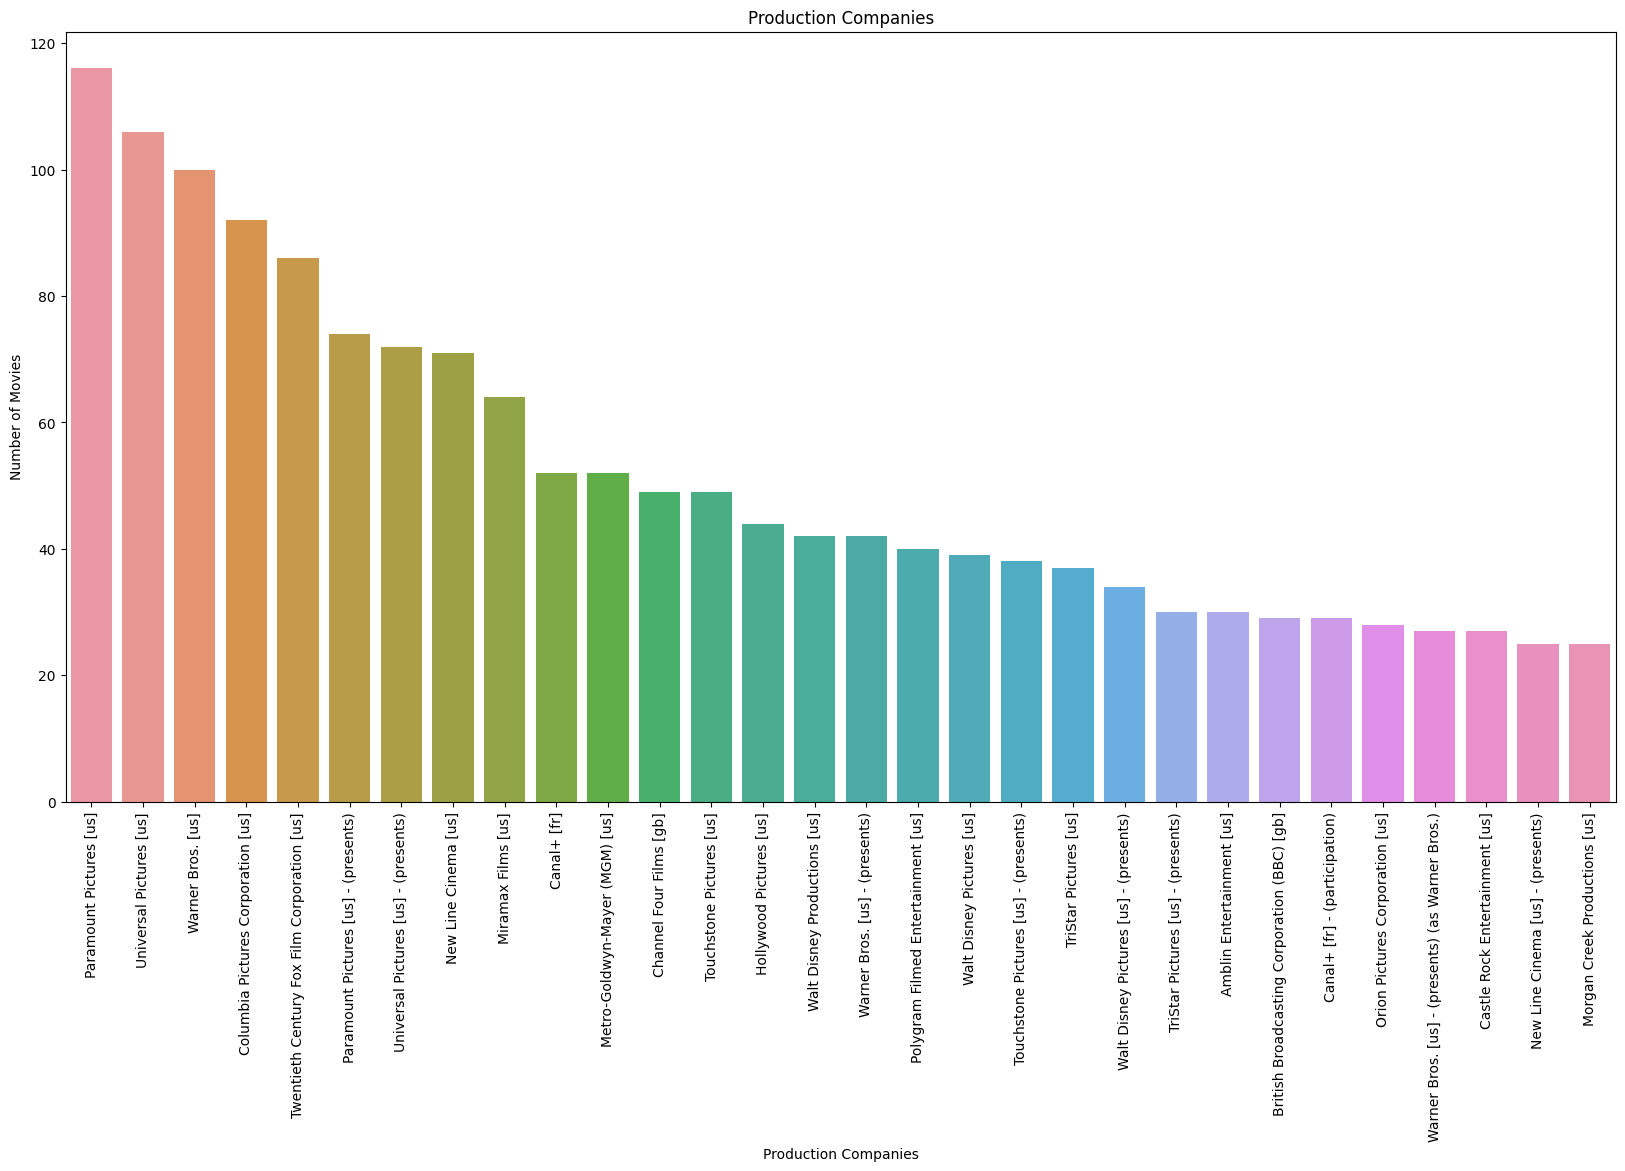

In [384]:
production_companies.groupby("name").value_counts().sort_values(ascending=False).to_frame().reset_index().rename(columns={0:'number_of_movies'}).head(30)
#seaborn ile gösterimi
plt.figure(figsize=(20,10))
sns.barplot(x=production_companies['name'].value_counts().head(30).index, y=production_companies['name'].value_counts().head(30).values)
plt.xticks(rotation=90)
plt.title('Production Companies')
plt.xlabel('Production Companies')
plt.ylabel('Number of Movies')
plt.show()



### En çok beğenilen animasyonların incelemesi ✨🧸

<AxesSubplot: title={'center': 'En çok beğenilmiş 10 çizgi film ve animasyon filmi'}, ylabel='rank'>

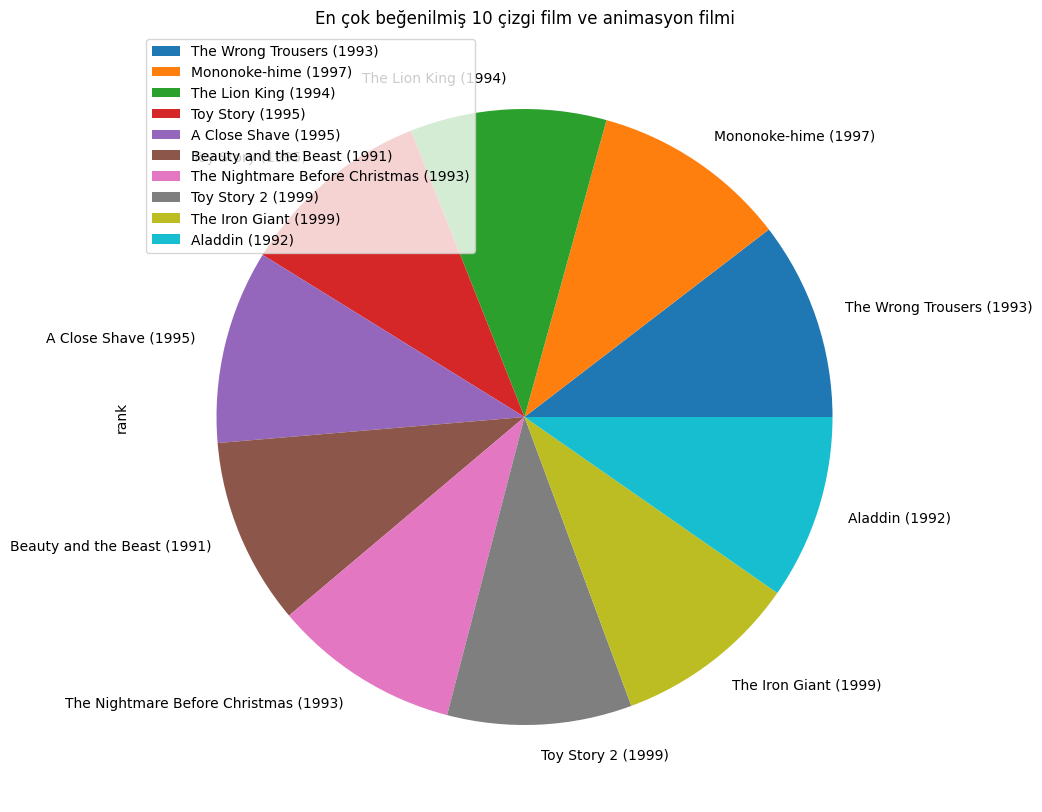

In [385]:
animation_movies = joined[joined['genre'].str.contains('Animation')]
agged = animation_movies.groupby("movieid").agg({'rank': 'max', "title": "max"}).sort_values('rank', ascending=False)

agged.head(10).plot.pie(y='rank', labels=agged['title'], figsize=(20,10), title='En çok beğenilmiş 10 çizgi film ve animasyon filmi')

### Aksiyon filmlerinin başlıca başrolleri ve aktörlerin oynadıkları karakterlerin puanlandırılmalarına göre gösterimleri 🚀🎬

In [386]:

movies_actors_joined_with_genre = movies_actors_joined.join(genres, how='inner',on='movieid',)

movies_actors_joined_with_genre["leading"] = movies_actors_joined_with_genre["leading"].apply(lambda x: x==1.0)
movies_actors_joined_with_genre = movies_actors_joined_with_genre.join(movies, how='inner',on='movieid',).sort_values('rank', ascending=False)
movies_actors_joined_with_genre = movies_actors_joined_with_genre[movies_actors_joined_with_genre['genre'] == "Action"]
grouped_by_actor = movies_actors_joined_with_genre.groupby('actorid').agg({'as_character': 'max', "name": "max","title":"max","genre":"max","leading":"max","rank":"max"}).sort_values('rank', ascending=False)

grouped_by_actor.head(10)


,as_character,name,title,genre,leading,rank
actorid,,,,,,
638959,[Luke Skywalker] <1>,"Hamill, Mark (I)",Star Wars: Episode VI - Return of the Jedi (1983),Action,True,8.8
1313259,[Officer Jack Traven] <1>,"Reeves, Keanu",The Matrix (1999),Action,True,8.7
1426359,[U.S. Marshal John 'The Eraser' Kruger] <1>,"Schwarzenegger, Arnold",True Lies (1994),Action,True,8.6
643265,[Captain Miller] <1>,"Hanks, Tom",Saving Private Ryan (1998),Action,True,8.6
511760,[Quinn Harris] <1>,"Ford, Harrison (I)",The Fugitive (1993),Action,True,8.6
599351,[Roger O. Thornhill] <1>,"Grant, Cary (I)",North by Northwest (1959),Action,True,8.5
338112,[Maximus] <1>,"Crowe, Russell",Heaven's Burning (1997),Action,True,8.5
2704998,[Ellen Ripley] <1>,"Weaver, Sigourney",Aliens (1986),Action,True,8.5
161108,[Dobbs] <1>,"Bogart, Humphrey",The Treasure of the Sierra Madre (1948),Action,True,8.4


### En iyi 20 kadın oyuncu 🚀🎬

<AxesSubplot: title={'center': 'En iyi kadın oyuncular'}, ylabel='number_of_movies'>

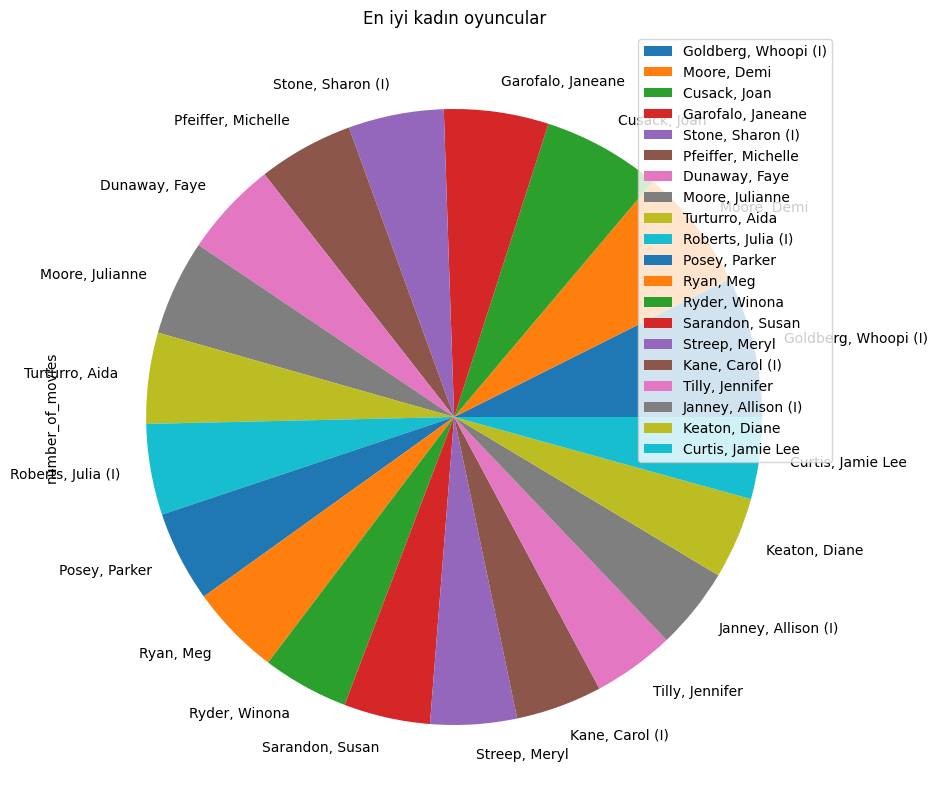

In [427]:
best_female_actor= actor_and_movies_grouped[actor_and_movies_grouped["sex"] == "F"]
best_female_actor.head(20)

best_female_actor.head(20).plot.pie(y='number_of_movies', labels=best_female_actor['name'], figsize=(20,10), title='En iyi kadın oyuncular')
